## Ejemplo: Optimización de la función Matias $f({x,y})=0.26 (x^2+y^2)-0.48xy $ con Descenso de Gradiente

In [144]:
import numpy as np
from numpy import arange
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

In [145]:

# función Booth (un solo óptimo global, diferenciable)
def booth(X):
    
    x = X[0]
    y = X[1]
    return 0.26*(x**2+y**2)-0.48*x*y
# Derivada de Booth

def dbooth(X):
    x = X[0]
    y = X[1]
    #d f/ d x
    pd1 = 0.52*x - 0.48*y
    
    #d f/ d y
    pd2 = 0.52*y - 0.48*x
    
    return np.array([pd1,pd2])

def hbooth(X):
    
    x = X[0]
    y = X[1]
    #2da Derivada parcial \partial f/ \partial x^2_1
    #(2*X[0]*2*X[0]**2)+2*X[0]*2*X[1]-2*X[0]*2*11) + 2*(X[0]+X[1]**2-7)*(1)
    #12*X[0]**2+4*X[1]-44+2
    
    dx1x1 = 0.52
    
    #2da Derivada parcial \partial f/ \partial x_1 x_2
    dx1x2 = 0
    
    dx2x2 = 0.52
    
    #Tenemos la información suficiente para crear la matriz Hessiana ya que es simétrica.
    
    M = np.array([[dx1x1,dx1x2],[dx1x2,dx2x2]])
    
    return M


#una función que envuelve boot para usarla directamente con las funciones de matplotlib
def wrapBooth(x,y):

    X = [x,y]
    return booth(X)



In [146]:
#rango
r_min,r_max = -10, 10

#ejes
xaxis = arange(-2, 2, 0.1)
yaxis = arange(-2, 3, 0.1)

#malla de valores evaluados por f(x,y)
x, y = np.meshgrid(xaxis, yaxis)

#evaluacion de los valores en la malla
results = wrapBooth(x, y)

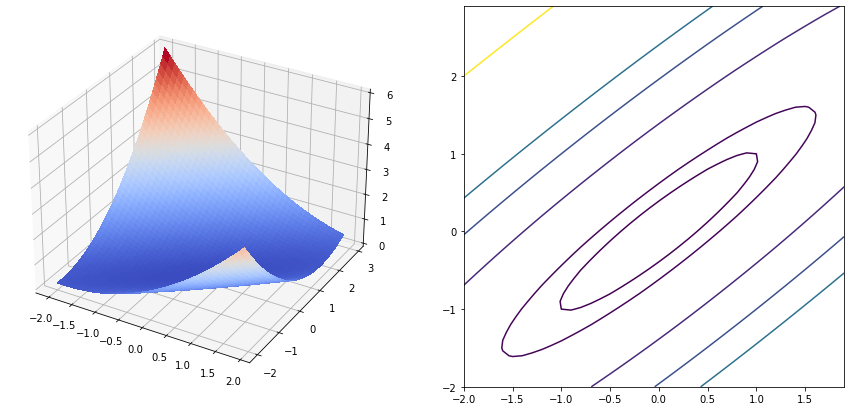

In [147]:
fig = plt.figure(figsize=(15,7))
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo

surf = ax.plot_surface(x, y, results, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


# ==============
# Second subplot
# ==============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2)

# plot a 3D wireframe like in the example mplot3d/wire3d_demo

ax.contour(x, y, results,[0.04,0.1,0.5,1,1.5,4])

plt.show()

In [67]:



h = hbooth(X)

e = (g.T@g/(g.T@h@g)).flatten()

e * dbooth(X)

NameError: name 'X' is not defined

In [92]:
X_0 = np.array([0.5,0.5]).T
g = dbooth(X_0)
h = hbooth(X_0)

np.linalg.inv(h)@g


array([1.41154904, 1.54262145])

In [148]:
#solución inicial x_0

X_0 = np.array([-1,-2]).T

 

apt = list([])
sol = list([])
G = list([])
GN = list([])
e = 0.1

for i in range(100):
    
    apt.append(booth(X_0))
    
    sol.append(list(X_0))

    g = dbooth(X_0)
    
    h = hbooth(X_0)
    
    #si g.T@h@g es positiva podemos hacer
#    G.append(g.T@h@g)
#    GN.append(g.T@g)

    
#    if (g.T@h@g) or True > 0:
    e = g.T@g/(g.T@h@g)
        
#    X_0 = X_0 - e*g
    
    X_0 = X_0 - np.linalg.inv(h)@g
    
    # si no, un valor pequeño de epsilon
    #X_0 = X_0 - 0.001*g

    
    

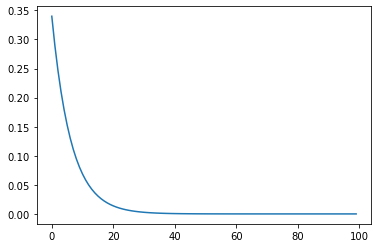

In [149]:
plt.plot(apt)

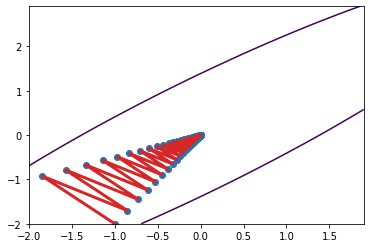

In [150]:
plt.scatter(np.array(sol)[:,0], np.array(sol)[:,1])
plt.plot(np.array(sol)[:,0], np.array(sol)[:,1],'C3', lw=3)
plt.contour(x, y, results,[0.5,50,200,300,400,500,600,700,800,900,1000])
plt.show()

In [99]:
X = [-7.5,5]

#e =0.08

aptn = list([])
soln = list([])

for i in range(100):
    aptn.append(booth(X))
    soln.append(list(X))
    
    Hinv = np.linalg.inv(hbooth(X))
    X_next = X - Hinv@np.array(dbooth(X))
    
    X = X_next

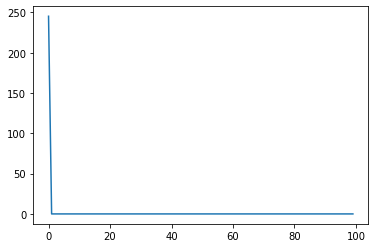

In [13]:
plt.plot(aptn)

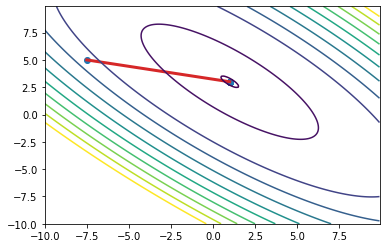

In [28]:
plt.scatter(np.array(soln)[:,0], np.array(soln)[:,1])
plt.plot(np.array(soln)[:,0], np.array(soln)[:,1],'C3', lw=3)
plt.contour(x, y, results,[0.5,50,200,300,400,500,600,700,800,900,1000])
plt.show()

https://towardsdatascience.com/optimization-eye-pleasure-78-benchmark-test-functions-for-single-objective-optimization-92e7ed1d1f12